In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('AB_NYC_2019.csv')

print("✅ NYC Airbnb data loaded successfully!")
df.head()

✅ NYC Airbnb data loaded successfully!


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
print("--- Data Information (Columns, Nulls, Types) ---")
df.info()

print("\n--- Statistical Summary ---")
df.describe()

--- Data Information (Columns, Nulls, Types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-nu

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [3]:

df.fillna({'reviews_per_month': 0}, inplace=True)

df.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

print("✅ Data cleaned successfully!")
print(f"Remaining missing values in 'reviews_per_month': {df['reviews_per_month'].isnull().sum()}")

✅ Data cleaned successfully!
Remaining missing values in 'reviews_per_month': 0


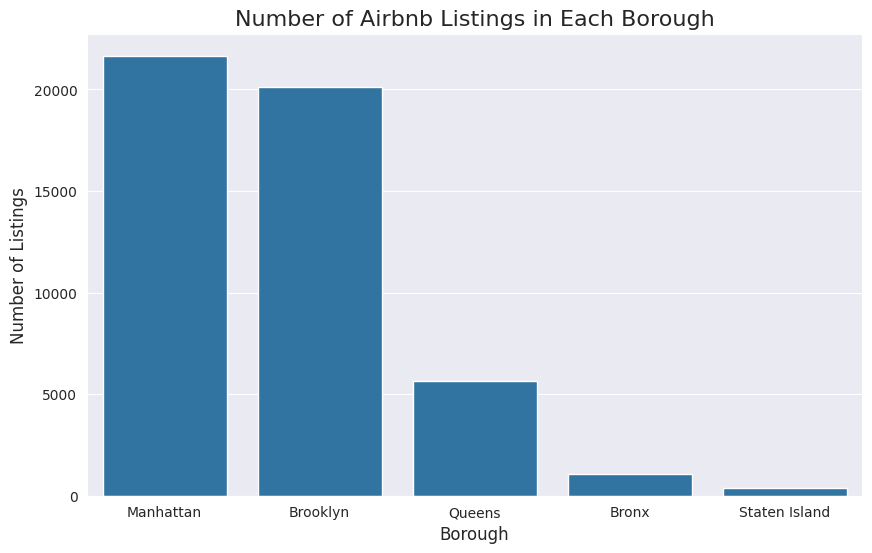

In [4]:

sns.set_style('darkgrid')

plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index)

plt.title('Number of Airbnb Listings in Each Borough', fontsize=16)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.show()

/tmp/ipython-input-879383679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index, palette='magma')


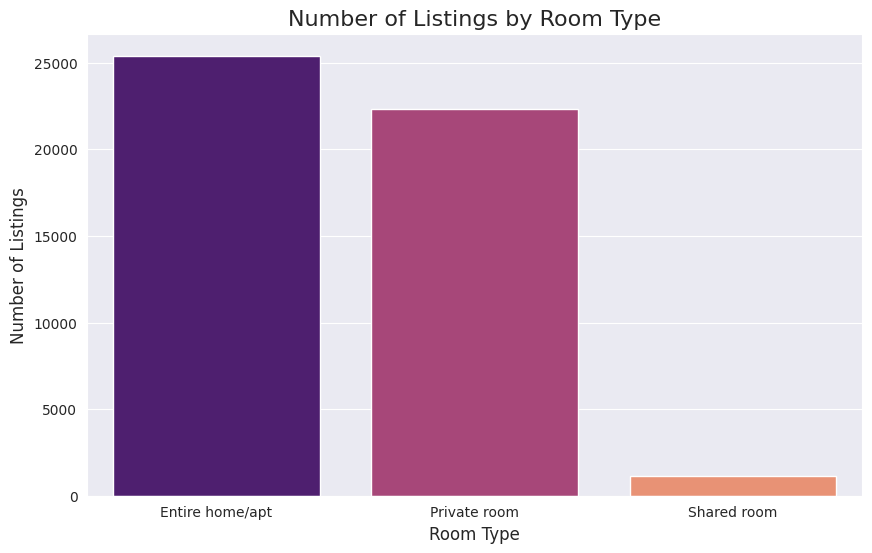

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index, palette='magma')

plt.title('Number of Listings by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.show()

/tmp/ipython-input-3252177366.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='price', data=affordable_df, palette='Oranges')


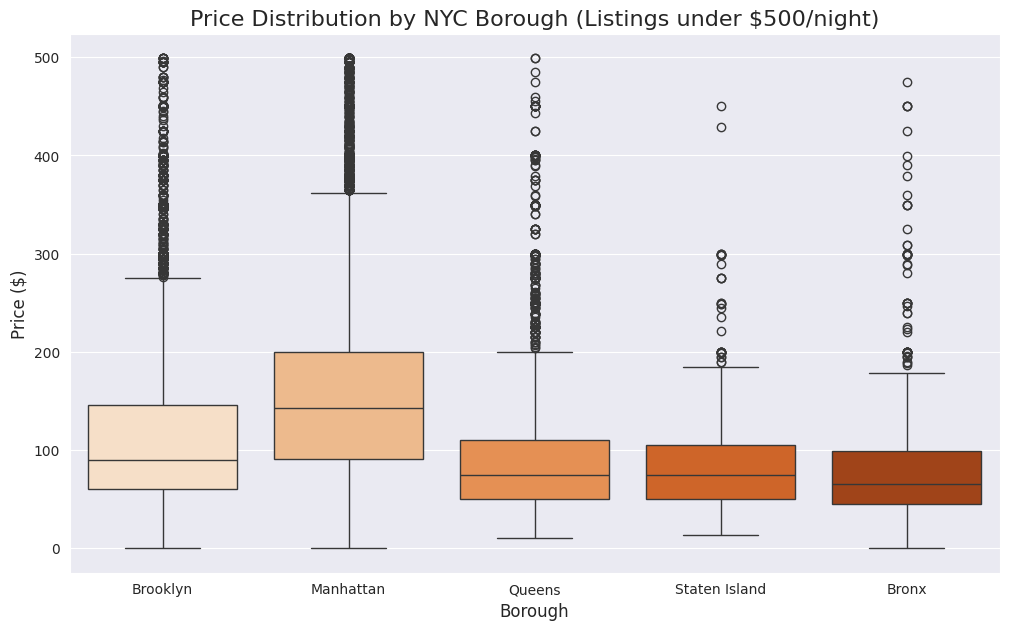

In [6]:

affordable_df = df[df['price'] < 500]

plt.figure(figsize=(12, 7))
sns.boxplot(x='neighbourhood_group', y='price', data=affordable_df, palette='Oranges')

plt.title('Price Distribution by NYC Borough (Listings under $500/night)', fontsize=16)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.show()

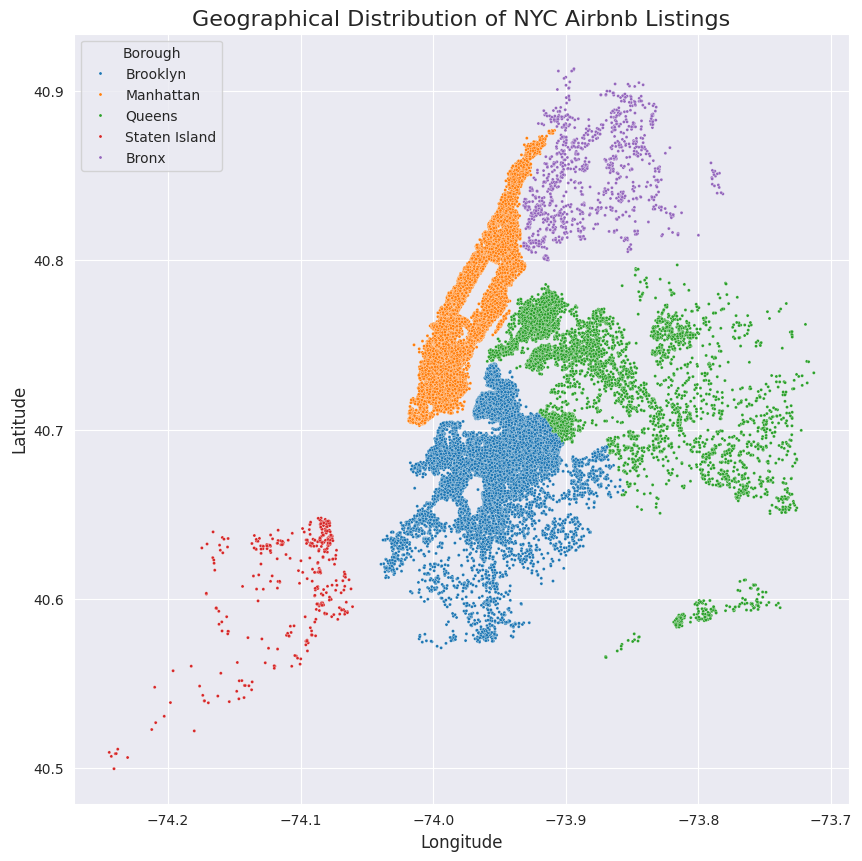

In [7]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='neighbourhood_group', s=5)

plt.title('Geographical Distribution of NYC Airbnb Listings', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Borough')
plt.show()

This analysis of the 2019 NYC Airbnb dataset reveals that listings are heavily concentrated in Manhattan and Brooklyn, with 'Entire home/apt' and 'Private room' being the most prevalent accommodation types. A review of pricing trends confirms that Manhattan stands out as the most expensive borough, commanding a significantly higher median price for its listings. The geographical visualizations reinforce these findings, showing a high density of properties in Manhattan and northern Brooklyn. Overall, the data paints a clear picture of a dynamic market with distinct patterns of price and availability across the five boroughs.